**Required Libraries**
___

In [7]:
import os
import glob
import numpy as np
from tensorflow import keras 
from keras.layers import Dense,Flatten, Conv2D
from keras.layers import MaxPooling2D, Dropout
import tensorflow as tf
import tensorflowjs as tfjs
from shutil import copyfile
from tensorflow.keras import layers



import matplotlib.pyplot as plt
from random import randint

**Pre-Processing the Dataset**
____
<!-- > Here we ....

<img src="https://www.python.org/static/community_logos/python-logo-master-v3-TM.png" title="Python Logo"/>

[Wikipedia Link](https://en.wikipedia.org "Wikipedia")
<br>
<span style="color:White">Text</span> -->

In [8]:
def load_dataset(directory):
    # Variables
    sample_size_per_category = 5000
    x = np.empty([0, 784])
    y = np.empty([0])
    mylist = []
    
    # Load all .npy files into our dataset
    dataset = glob.glob(os.path.join(directory, '*.npy'))
    print("Dataset List : ", dataset)

    # Load each file in the dataset
    for idx, file in enumerate(dataset):
        data = np.load(file)
        data = data[0: sample_size_per_category, :]
        labels = np.full(data.shape[0], idx)

        x = np.concatenate((x, data), axis=0)
        y = np.append(y, labels)

        categories_list, ext = os.path.splitext(os.path.basename(file))
        mylist.append(categories_list)
    
    return x, y, mylist 

# Randomize the data
def random_data(datax, datay):
    permutation = np.random.permutation(datay.shape[0])
    x = datax[permutation, :]
    y = datay[permutation]
    return x, y
    
    
#Seperate dataset to training data and testing data
def train_test_split(datax, datay, ratio = 0.1):
    validations_samples  = int(datax.shape[0] / 100 * (ratio * 100))
    print("valid samples", validations_samples)
    x_test  = datax[0:validations_samples, :]
    y_test  = datay[0:validations_samples]
    x_train = datax[validations_samples:datax.shape[0], :]
    y_train = datay[validations_samples:datay.shape[0]]


    return x_train, y_train, x_test, y_test

def data_preprocessing(datax_train, datax_test):
    x_train = datax_train.reshape(datax_train.shape[0], 28, 28, 1).astype('float32')
    x_test  =  datax_test.reshape(datax_test.shape[0], 28, 28, 1).astype('float32')


    x_train /= 255.0
    x_test /= 255.0

    return x_train, x_test

def data_encoding(datay_train, datay_test, data_category):
    y_train = keras.utils.to_categorical(datay_train, len(data_category))
    y_test  = keras.utils.to_categorical(datay_test, len(data_category))

    return y_train, y_test
    
yourdirectory = 'Trained Dataset'
x, y, categories_list = load_dataset(yourdirectory)
print("Number of Categories : " ,len(categories_list))
x, y = random_data(x, y)
x_train, y_train, x_test, y_test = train_test_split(x, y)


Dataset List :  ['Trained Dataset\\angel.npy', 'Trained Dataset\\ant.npy', 'Trained Dataset\\apple.npy', 'Trained Dataset\\axe.npy', 'Trained Dataset\\backpack.npy', 'Trained Dataset\\banana.npy', 'Trained Dataset\\bandage.npy', 'Trained Dataset\\baseball_bat.npy', 'Trained Dataset\\basketball.npy', 'Trained Dataset\\bathtub.npy', 'Trained Dataset\\bear.npy', 'Trained Dataset\\beard.npy', 'Trained Dataset\\bee.npy', 'Trained Dataset\\bicycle.npy', 'Trained Dataset\\binoculars.npy', 'Trained Dataset\\bird.npy', 'Trained Dataset\\birthday_cake.npy', 'Trained Dataset\\book.npy', 'Trained Dataset\\boomerang.npy', 'Trained Dataset\\bowtie.npy', 'Trained Dataset\\bracelet.npy', 'Trained Dataset\\brain.npy', 'Trained Dataset\\bread.npy', 'Trained Dataset\\bridge.npy', 'Trained Dataset\\broccoli.npy', 'Trained Dataset\\broom.npy', 'Trained Dataset\\bucket.npy', 'Trained Dataset\\bus.npy', 'Trained Dataset\\bush.npy', 'Trained Dataset\\butterfly.npy', 'Trained Dataset\\cactus.npy', 'Trained Dat

**Random Test**
____

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  

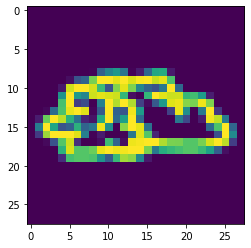

In [9]:
idx = randint(0, len(x_train))
print(x_train[idx].reshape(28,28))
plt.imshow(x_train[idx].reshape(28,28)) 
print("category: ", categories_list[int(y_train[idx].item())])

**Final Preprocessing**
___

In [10]:
x_train, x_test = data_preprocessing(x_train, x_test)
y_train, y_test = data_encoding(y_train, y_test, categories_list)

**CNN MODEL**
___

In [11]:
# Our CNN Model
# Number of Categories in our Dataset
Num_of_Category = 100

model = keras.Sequential()
model.add(Conv2D(16, (3, 3),padding='same',input_shape=x_train.shape[1:], activation='relu'))
model.add(Conv2D(16, (3, 3),padding='same',input_shape=x_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(MaxPooling2D(pool_size =(2,2)))

model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(512, activation='tanh'))
model.add(Dense(Num_of_Category, activation='softmax')) ### NUMBER OF Category

# Compiling model
adam = tf.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['top_k_categorical_accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                  

**CNN Model Training**
____

In [12]:
model.fit(x = x_train, y = y_train, validation_split = 0.1, batch_size = 256, verbose = 2, epochs = 50)

Epoch 1/50
1583/1583 - 213s - loss: 1.5083 - top_k_categorical_accuracy: 0.8434 - val_loss: 1.0356 - val_top_k_categorical_accuracy: 0.9129 - 213s/epoch - 134ms/step
Epoch 2/50
1583/1583 - 215s - loss: 0.9503 - top_k_categorical_accuracy: 0.9226 - val_loss: 0.9043 - val_top_k_categorical_accuracy: 0.9262 - 215s/epoch - 136ms/step
Epoch 3/50
1583/1583 - 217s - loss: 0.8268 - top_k_categorical_accuracy: 0.9354 - val_loss: 0.8510 - val_top_k_categorical_accuracy: 0.9321 - 217s/epoch - 137ms/step
Epoch 4/50
1583/1583 - 217s - loss: 0.7539 - top_k_categorical_accuracy: 0.9424 - val_loss: 0.7754 - val_top_k_categorical_accuracy: 0.9401 - 217s/epoch - 137ms/step
Epoch 5/50
1583/1583 - 217s - loss: 0.7067 - top_k_categorical_accuracy: 0.9471 - val_loss: 0.7750 - val_top_k_categorical_accuracy: 0.9388 - 217s/epoch - 137ms/step
Epoch 6/50
1583/1583 - 222s - loss: 0.6669 - top_k_categorical_accuracy: 0.9507 - val_loss: 0.7523 - val_top_k_categorical_accuracy: 0.9417 - 222s/epoch - 140ms/step
Epoc

**Simple Evaluation for Model Accuracy**
___

In [13]:
percentage = model.evaluate(x_test, y_test, verbose = 1)
print('Test accuracy: {:0.2f}%'.format(percentage[1] * 100))

1563/1563 [==============================] - 22s 14ms/step - loss: 0.9153 - top_k_categorical_accuracy: 0.9379
Test accuarcy: 93.79%


**Plotting the Inference**
___

1/1 [==============================] - 0s 183ms/step
['backpack', 'butterfly', 'elephant', 'basketball', 'mug']


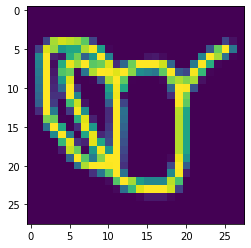

In [14]:
idx = randint(0, len(x_test))
img = x_test[idx]
plt.imshow(img.squeeze()) 
pred = model.predict(np.expand_dims(img, axis=0))[0]
ind = (-pred).argsort()[:5]
latex = [categories_list[x] for x in ind]
print(latex)

**Saving The Model**
___

In [15]:
model.save('finalmodel100.h5')

**Converting the Model**
___

In [25]:
import tensorflowjs as tfjs
from os import path
path = r"D:\Documents\National Chiao Tung University\Intro to Artificial Intelligence\Github Submit"
newFolderName="finalsubmission"
try:
    os.mkdir(os.path.join(path, newFolderName))
except FileExistsError:
    pass
# myjsonmodel = model.to_json()
# with open("testjsonbaru.json", "w") as json_file:
#     json_file.write(myjsonmodel)
tfjs.converters.save_keras_model(model,os.path.join(path, newFolderName))


In [ ]:
# !mkdir model
# !tensorflowjs_converter --input_format keras modeledited40.h5 model/

A subdirectory or file model already exists.
2022-06-14 16:27:43.620281: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-06-14 16:27:43.620505: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [ ]:
# copy class_names.txt model/class_names.txt
# import shutil

# source = r"D:\Documents\National Chiao Tung University\Intro to Artificial Intelligence\Github Submit\categories_list.txt"
# destination = r"D:\Documents\National Chiao Tung University\Intro to Artificial Intelligence\Github Submit\model\categories_list.txt"
# shutil.copyfile(source, destination)

In [ ]:
# # copy class_names.txt model/class_names.txt
# import shutil
# source = r"D:\Documents\National Chiao Tung University\Intro to Artificial Intelligence\Final Project\class_names.txt"
# destination = r"D:\Documents\National Chiao Tung University\Intro to Artificial Intelligence\Final Project\model\class_names.txt"
# shutil.copyfile(source, destination)

In [ ]:
# from http.server import BaseHTTPServer, BaseHTTPRequestHandlerimport
# import ssl

# httpd = BaseHTTPServer.HTTPServer(('localhost', 4443), SimpleHTTPServer.SimpleHTTPRequestHandler)
# httpd.socket = ssl.wrap_socket (httpd.socket, certfile='./server.pem', server_side=True)
# httpd.serve_forever()